In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/home/svanni/ml-zoomcamp/ml-zoomcamp-homework/homework/car_fuel_efficiency.csv")

In [117]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [118]:
base = [ 'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg' ] 

In [121]:
df_five_columns = df[base]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

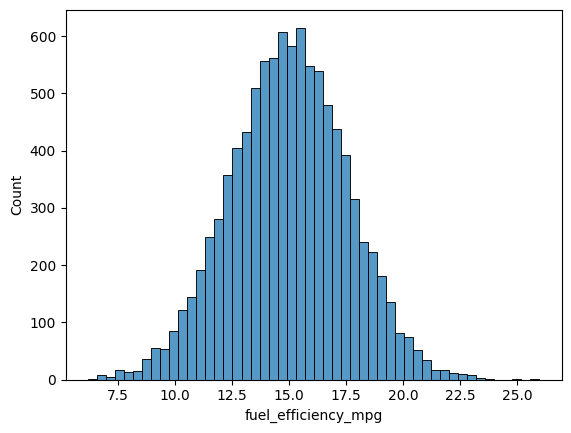

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [8]:
df_five_columns.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [21]:
df_five_columns['horsepower'].median()

np.float64(149.0)

In [120]:
n = len(df_five_columns)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - (n_train + n_val)

In [203]:
idx = np.arange(n)

In [204]:
np.random.seed(42)
np.random.shuffle(idx)

In [205]:
df_train = df_five_columns.iloc[idx[:n_train]]
df_val = df_five_columns.iloc[idx[n_train:n_train+n_val]]
df_test = df_five_columns.iloc[idx[n_train+n_val:]]

In [206]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [207]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [208]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [209]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [210]:
mean = df_train['horsepower'].mean()

In [211]:
def prepare_X(df, missing_value=0):
    df_local = df.copy()
    df_local['horsepower'] = df_local['horsepower'].fillna(missing_value)
    X = df_local.values
    return X

In [212]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [213]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [214]:
X_train = prepare_X(df_train, mean)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = round(rmse(y_val, y_pred), 2)
print(score, w0, w)

0.61 28.907110616444456 [ 0.00012034  0.01030286 -0.00500997 -0.00022574]


In [215]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = round(rmse(y_val, y_pred), 2)
print(score, w0, w)

0.52 28.810749329527205 [ 9.88022381e-05  3.54195814e-03 -5.01316573e-03  3.51135284e-04]


In [216]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [219]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w0, score)

0 28.810749329527205 0.52
0.01 24.910505404196016 0.52
0.1 11.229188181764274 0.52
1 1.7296519833794184 0.52
5 0.36338861705899106 0.52
10 0.18285102563308023 0.52
100 0.018396690311365302 0.52


In [199]:
scores_raw = np.zeros(10)
scores = np.zeros(10)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] :
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_five_columns.iloc[idx[:n_train]]
    df_val = df_five_columns.iloc[idx[n_train:n_train+n_val]]
    df_test = df_five_columns.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores_raw[seed] = rmse(y_val, y_pred)
    print(f"{seed} {scores_raw[seed]}")
    scores[seed] = round(scores_raw[seed], 3)
round(np.std(scores_raw), 3)

0 0.038035652883783334
1 0.039328223708578885
2 0.039453757373794474
3 0.038758842875225345
4 0.03729164721126398
5 0.0393820239869507
6 0.03895208317977584
7 0.0384066643979178
8 0.04020557127213683
9 0.03861054416168406


np.float64(0.001)

In [220]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
#rng = np.random.default_rng(9)
#rng.shuffle(idx)
print(idx)
df_train = df_five_columns.iloc[idx[:n_train+n_val]]
df_test = df_five_columns.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
    
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
round(rmse(y_test, y_pred), 3)

[9066 3073 2476 ... 6782 4444 8574]


np.float64(0.516)